# Logistic Regression for 10 Primary Genres

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
data = pd.read_csv(os.path.join('Data', 'allgenres.csv'))
data.head()

,id,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,new_genres
0,26807,Yhung T.O.,0.302000,0.811,206593.0,0.574,0.000000,0.0865,-7.003,0.180,96.993,0.546,60.0,5,0,1,"['cali rap', 'west coast trap']",rap
1,9250,Grieves,0.042100,0.592,185373.0,0.509,0.000000,0.0814,-6.685,0.375,180.121,0.631,44.0,11,1,2,"['abstract hip hop', 'indie pop rap', 'undergr...",rap
2,15653,Mark Battles,0.209000,0.745,185487.0,0.741,0.000000,0.5100,-7.212,0.184,94.002,0.480,57.0,2,1,2,"['canadian hip hop', 'deep underground hip hop...",rap
3,5271,DJ Jazzy Jeff,0.029000,0.782,250200.0,0.639,0.000000,0.1970,-8.154,0.365,95.116,0.487,47.0,1,1,1,"['gangster rap', 'hip hop', 'old school hip ho...",rap
4,25090,Tion Wayne,0.000415,0.572,169355.0,0.519,0.000023,0.1290,-8.054,0.243,100.453,0.704,77.0,10,0,2,"['london rap', 'uk hip hop']",rap


In [5]:
cleaned_data=data.drop(["id","artists","count","genres","popularity","genres",],axis=1)
cleaned_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,new_genres
0,0.302000,0.811,206593.0,0.574,0.000000,0.0865,-7.003,0.180,96.993,0.546,5,0,rap
1,0.042100,0.592,185373.0,0.509,0.000000,0.0814,-6.685,0.375,180.121,0.631,11,1,rap
2,0.209000,0.745,185487.0,0.741,0.000000,0.5100,-7.212,0.184,94.002,0.480,2,1,rap
3,0.029000,0.782,250200.0,0.639,0.000000,0.1970,-8.154,0.365,95.116,0.487,1,1,rap
4,0.000415,0.572,169355.0,0.519,0.000023,0.1290,-8.054,0.243,100.453,0.704,10,0,rap


In [6]:
X = cleaned_data.drop("new_genres", axis=1)
y = cleaned_data["new_genres"]
print(X.shape, y.shape)

(1000, 12) (1000,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=10, solver= 'newton-cg')
classifier

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5493333333333333
Testing Data Score: 0.472


In [12]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['metal' 'country' 'edm' 'alternative' 'christian' 'classical' 'edm'
 'country' 'r&b' 'rap']
First 10 Actual labels: ['alternative', 'latin', 'r&b', 'edm', 'christian', 'jazz', 'christian', 'latin', 'edm', 'rap']


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,metal,alternative
1,country,latin
2,edm,r&b
3,alternative,edm
4,christian,christian
...,...,...
245,edm,edm
246,country,latin
247,r&b,r&b
248,classical,classical


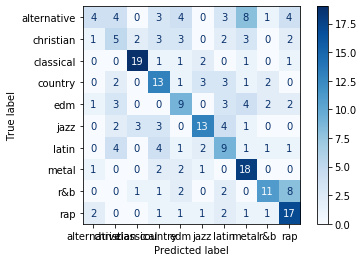

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# Hyperparameter Tuning

In [15]:
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
              'C': [100, 10, 1.0, 0.1, 0.01,0.001,0.0001,0.0005,0.005],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [18]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=newton-cg .............................
[CV] ... C=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV] ....... C=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] . C=100, penalty=l1, solver=liblinear, score=0.553, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.547, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.500, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.467, total=   0.2s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.527, total=   0.2s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.540, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] . C=100, penalty=l2, solver=newton-cg, score=0.527, total=   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.540, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.533, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.480, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.460, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.520, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.567, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.540, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] .. C=10, penalty=l1, solver=liblinear, score=0.547, total=   0.2s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.507, total=   0.2s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.460, total=   0.2s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.513, total=   0.1s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.520, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.527, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.487, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.513, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.520, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.487, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.453, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.520, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.560, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.540, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.507, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.507, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.513, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.467, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.480, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.507, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.507, total=   0.0s
[CV] 

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.327, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.453, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.440, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.433, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.447, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.393, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.453, total=   0.0s
[CV] 

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-p

[CV]  C=0.001, penalty=l2, solver=newton-cg, score=0.160, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, score=0.127, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, score=0.100, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.133, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.147, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.160, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.127, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-p


[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.207, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.200, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.240, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.293, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.287, total=   0.0s
[CV] C=0.0005, penalty=l1, solver=newton-cg ..........................
[CV]  C=0.0005, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0005, penalty=l1, solver=newton-cg ..........................
[CV]  C=0.0005, penalty=l1, solver=newton-cg, score=nan, total=   

C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\bvera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    4.0s finished



[CV] C=0.005, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.005, penalty=l2, solver=newton-cg, score=0.333, total=   0.0s
[CV] C=0.005, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.005, penalty=l2, solver=newton-cg, score=0.247, total=   0.0s
[CV] C=0.005, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.005, penalty=l2, solver=lbfgs, score=0.307, total=   0.0s
[CV] C=0.005, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.005, penalty=l2, solver=lbfgs, score=0.307, total=   0.0s
[CV] C=0.005, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.005, penalty=l2, solver=lbfgs, score=0.333, total=   0.0s
[CV] C=0.005, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.005, penalty=l2, solver=lbfgs, score=0.333, total=   0.0s
[CV] C=0.005, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.005, penalty=l2, solver=lbfgs, score=0.253, total=   0.0s
[CV

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001, 0.0005,
                               0.005],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.5186666666666667


# Decision Tree

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.348

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth= 10, min_samples_leaf= 1, min_samples_split= 5)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.48

In [22]:
feature_names = cleaned_data.columns

In [23]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12592038637041508, 'danceability'),
 (0.12544906761006375, 'acousticness'),
 (0.11079362983903518, 'valence'),
 (0.10916664339489268, 'energy'),
 (0.10801120178850453, 'speechiness'),
 (0.1059209011492661, 'instrumentalness'),
 (0.09920971711539427, 'loudness'),
 (0.06177975716402704, 'duration_ms'),
 (0.05663326139866322, 'tempo'),
 (0.053543594524613804, 'liveness'),
 (0.03030668724099855, 'key'),
 (0.013265152404125732, 'mode')]

In [24]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9986666666666667
Testing Data Score: 0.348


In [25]:
print(f"Logistical Testing Data Score: {classifier.score(X_test_scaled, y_test)}")
print(f"Decision Tree Testing Data Score: {clf.score(X_test_scaled, y_test)}")
print(f"Random Forest Testing Data Score: {rf.score(X_test_scaled, y_test)}")


Logistical Testing Data Score: 0.472
Decision Tree Testing Data Score: 0.348
Random Forest Testing Data Score: 0.48


# Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [27]:
param_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
grid = GridSearchCV(rf, param_grid, verbose=3)

In [28]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.540, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.553, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.540, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.493, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.520, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.540, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.547, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.553, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.520, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.533, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.540, total=   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.547, total=   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400, s

[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.533, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.487, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.533, total=   0.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.540, total=   0.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.560, total=   0.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.553, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.527, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.507, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.527, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.553, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand